In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import netgraph as ng
import networkx as nx

from pathlib import Path
from visu_utils import *


In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:


PREFIX = "mteb_ds"

df_paths = ["exported_data/normalized_m1.df", "exported_data/normalized_m2.df", "exported_data/normalized_m4.df","exported_data/normalized_13.df", "exported_data/normalized_m10.df", "exported_data/normalized_m12.df"]

# read csv
dfs = [pd.read_csv(path) for path in df_paths]

dfs = pd.concat(dfs).reset_index()


dfs = text_embeddings_metadata_results_preprocessing(dfs, models=MODELS_MAIN_EXPES)


METRIC = "I(X_1->X_2)/d_2"

In [7]:
## Impacts of n_modes on the MI estimation

<Axes: xlabel='marg_modes', ylabel='I(X_1->X_2)/d_2'>

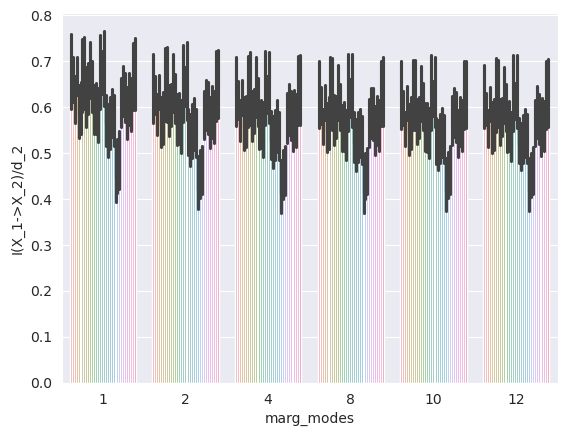

In [8]:
sns.barplot(dfs, y="I(X_1->X_2)/d_2", x="marg_modes", hue="model_1", legend=False)

In [9]:
## avg predictiveness of models


In [10]:
avg_informativeness = dfs.groupby(["model_1", "marg_modes"])[[METRIC]].agg(["median"])

# drop level
avg_informativeness.columns = avg_informativeness.columns.droplevel(1)

# rank for each model for each marg_modes
avg_informativeness['rank'] = avg_informativeness.groupby('marg_modes')[METRIC].rank(ascending=False)
avg_informativeness['ranking'] = "informativeness"

avg_informativeness = avg_informativeness.reset_index()

avg_informativeness['model'] = avg_informativeness['model_1']
avg_informativeness['value'] = avg_informativeness[METRIC]

<Axes: xlabel='marg_modes', ylabel='rank'>

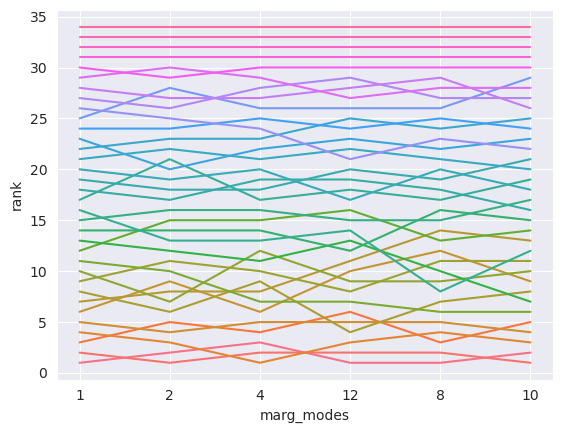

In [11]:

avg_informativeness_ = avg_informativeness.sort_values(by=METRIC, ascending=False)
avg_informativeness_['marg_modes'] = avg_informativeness_['marg_modes'].astype(str)
sns.lineplot(data=avg_informativeness_, x="marg_modes", y="rank", hue="model_1", legend=False)


In [12]:

## Compare models matrices

/home/mdarrin/Documents/phd/transformers/EMIRR/EMIR/nlp_embeddings/analysis/visu_utils.py:57: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot("model_1", "model_2", metric)
/home/mdarrin/Documents/phd/transformers/EMIRR/EMIR/nlp_embeddings/analysis/visu_utils.py:57: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot("model_1", "model_2", metric)
/home/mdarrin/Documents/phd/transformers/EMIRR/EMIR/nlp_embeddings/analysis/visu_utils.py:57: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot("model_1", "model_2", metric)
/home/mdarrin/Documents/phd/transformers/EMIRR/EMIR/nlp_embeddings/analysis/visu_utils.py:57: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot("model_1", "model_2", metric)
/home/mdarrin/Documents/phd/transformers/EMIRR/EMIR/nlp_embeddings/a

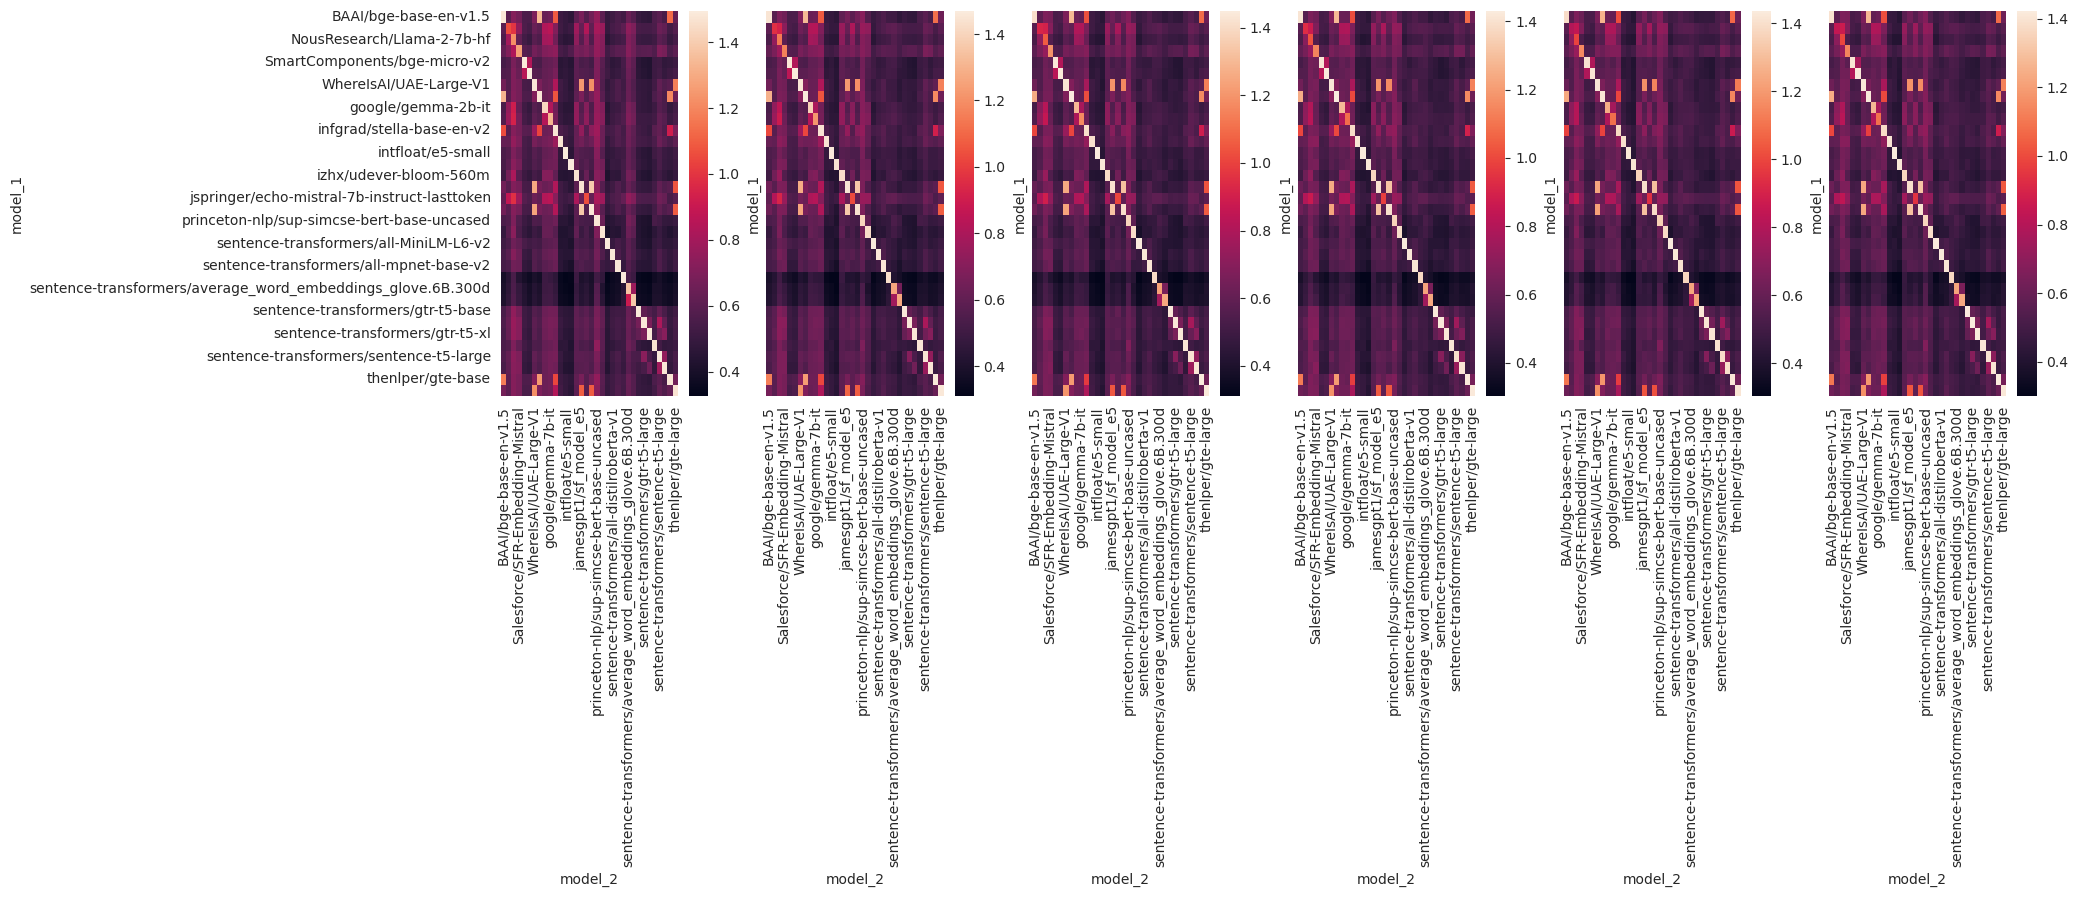

In [13]:

from scipy.cluster.hierarchy import linkage, optimal_leaf_ordering, leaves_list

n_nodes = dfs['marg_modes'].unique()

fig, axs = plt.subplots(1, len(n_nodes), figsize=(20, 5), sharey=True)
for k, n in enumerate(n_nodes):
    table = make_table_pivot(METRIC, dfs[dfs['marg_modes'] == n])
    
    #link = linkage(table, method='ward', optimal_ordering=True)
    #order = leaves_list(optimal_leaf_ordering(link, table))
    # table = table.iloc[order, order]
    # reorder
    sns.heatmap(table, ax=axs[k])
    


In [14]:
### Our expes


In [15]:
### Our expes

In [16]:
classifcation_df = pd.read_csv('exported_data/classification_many.csv')


classifcation_df['model'] = classifcation_df['model'].apply(lambda x: eval(x)[0])

rankings = []
for idx, df in dfs.groupby(["marg_modes"]):
    print(idx)
    ranking = make_rankings_table(classifcation_df, df, METRIC)
    ranking['Modes'] = idx

    rankings.append(ranking)
    
rankings = pd.concat(rankings, axis=0)



1
2
4
8
10
12


/tmp/ipykernel_46338/2999178081.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for idx, df in dfs.groupby(["marg_modes"]):
/home/mdarrin/Documents/phd/transformers/EMIRR/EMIR/nlp_embeddings/analysis/visu_utils.py:57: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot("model_1", "model_2", metric)
/home/mdarrin/Documents/phd/transformers/EMIRR/EMIR/nlp_embeddings/analysis/visu_utils.py:57: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot("model_1", "model_2", metric)
/home/mdarrin/Documents/phd/transformers/EMIRR/EMIR/nlp_embeddings/analysis/visu_utils.py:57: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot("model_1", "model_2", metric

In [17]:

toplot_info = ranking[ranking['ranking'] ==  "informativeness"]
toplot_classif = ranking[ranking['ranking'] ==  "classification"]


# rank both according to toplot_info value
toplot_info = toplot_info.sort_values(by="value", ascending=False)
info_models = toplot_info['model'].values
classifs_models = toplot_classif['model'].values


# make intersection
info_models = set(info_models)
classifs_models = set(classifs_models)
models = list(info_models.intersection(classifs_models))


In [18]:
ranking

,model,value,rank,ranking,community,Modes
0,Salesforce/SFR-Embedding-Mistral,0.722167,7.000000,classification,9,12
1,GritLM/GritLM-7B,0.719629,10.428571,classification,1,12
2,WhereIsAI/UAE-Large-V1,0.714177,7.687500,classification,6,12
3,google/gemma-7b-it,0.706332,12.571429,classification,1,12
4,jspringer/echo-mistral-7b-instruct-lasttoken,0.701295,12.785714,classification,1,12
...,...,...,...,...,...,...
29,izhx/udever-bloom-560m,0.483055,30.000000,informativeness,1,12
30,sentence-transformers/LaBSE,0.468232,31.000000,informativeness,1,12
31,sentence-transformers/average_word_embeddings_...,0.415535,32.000000,informativeness,8,12
32,sentence-transformers/average_word_embeddings_...,0.411198,33.000000,informativeness,8,12


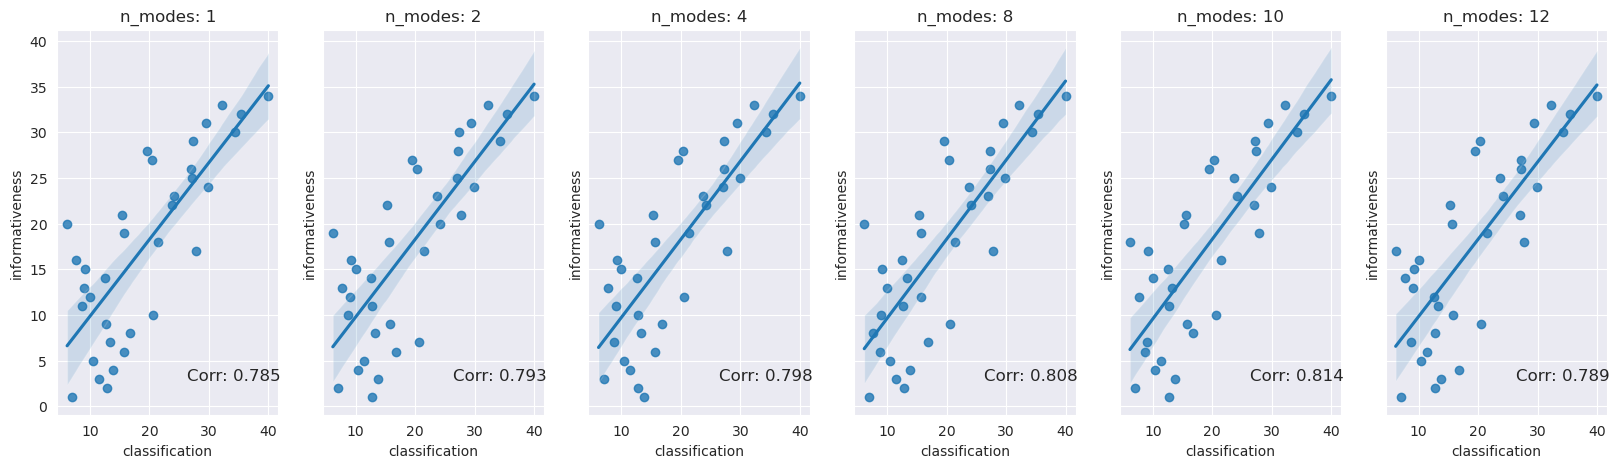

In [19]:

## correlations between the rankings

# pivot table
# dedup
_ranking = rankings.groupby(["model", "ranking", "Modes"]).first().reset_index()
rankings_pivot = _ranking.pivot(columns="ranking", index=["Modes", "model"], values="rank").reset_index()


fig, axes = plt.subplots(1, len(n_nodes), figsize=(20, 5), sharey=True)

for k, n in enumerate(n_nodes):
    sns.regplot(data=rankings_pivot[rankings_pivot['model'].isin(models) & (rankings_pivot['Modes'] == n)], x="classification", y="informativeness", ax=axes[k])

    # annotate with correlation
    corr = rankings_pivot[rankings_pivot['model'].isin(models) & (rankings_pivot['Modes'] == n)][["classification", "informativeness"]].corr().iloc[0, 1]
    axes[k].annotate(f"Corr: {corr:.3f}", (0.8, 0.1), xycoords='axes fraction', ha='center', va='center', fontsize=12)

    axes[k].set_title(f"n_modes: {n}")


/tmp/ipykernel_46338/1677006220.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kendall_plot = rankings_pivot.groupby("Modes").corr('kendall').loc[(slice(None), "classification"), "informativeness"].reset_index()


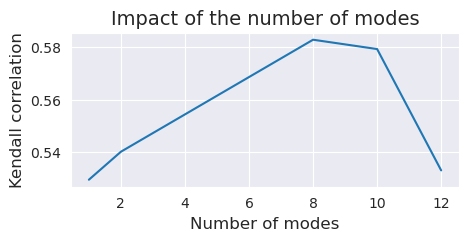

In [20]:
## Correlation with the classification scores


kendall_plot = rankings_pivot.groupby("Modes").corr('kendall').loc[(slice(None), "classification"), "informativeness"].reset_index()

fig, ax = plt.subplots(1, 1, figsize=(5, 2))
sns.lineplot(data=kendall_plot, x="Modes", y="informativeness")

ax.set_title("Impact of the number of modes", fontsize=14)
ax.set_ylabel("Kendall correlation", fontsize=12)
ax.set_xlabel("Number of modes", fontsize=12)


path = Path(f"../../../papers/emir-embedding-comparison/fig/nlp/{PREFIX}_kendall_modes_impact_{sanitize_metric_name(METRIC)}.pdf")
path.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(path, bbox_inches='tight')


/tmp/ipykernel_46338/4294589117.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kendall_plot = rankings_pivot.groupby("Modes").corr('spearman').loc[(slice(None), "classification"), "informativeness"].reset_index()


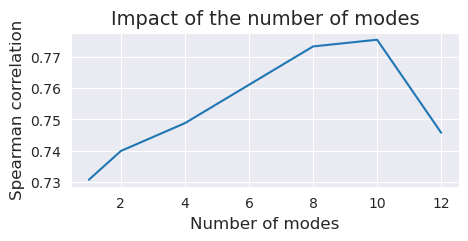

In [21]:


kendall_plot = rankings_pivot.groupby("Modes").corr('spearman').loc[(slice(None), "classification"), "informativeness"].reset_index()

fig, ax = plt.subplots(1, 1, figsize=(5, 2))
sns.lineplot(data=kendall_plot, x="Modes", y="informativeness")

ax.set_title("Impact of the number of modes", fontsize=14)
ax.set_ylabel("Spearman correlation", fontsize=12)
ax.set_xlabel("Number of modes", fontsize=12)


path = Path(f"../../../papers/emir-embedding-comparison/fig/nlp/{PREFIX}_spearman_modes_impact_{sanitize_metric_name(METRIC)}.pdf")
path.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(path, bbox_inches='tight')




/tmp/ipykernel_46338/2805959682.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kendall_plot = rankings_pivot.groupby("Modes").corr('pearson').loc[(slice(None), "classification"), "informativeness"].reset_index()


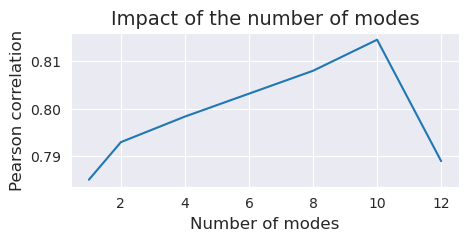

In [22]:

kendall_plot = rankings_pivot.groupby("Modes").corr('pearson').loc[(slice(None), "classification"), "informativeness"].reset_index()

fig, ax = plt.subplots(1, 1, figsize=(5, 2))
sns.lineplot(data=kendall_plot, x="Modes", y="informativeness")

ax.set_title("Impact of the number of modes", fontsize=14)
ax.set_ylabel("Pearson correlation", fontsize=12)
ax.set_xlabel("Number of modes", fontsize=12)


path = Path(f"../../../papers/emir-embedding-comparison/fig/nlp/{PREFIX}_pearson_modes_impact_{sanitize_metric_name(METRIC)}.pdf")
path.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(path, bbox_inches='tight')
